In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mesolve, qeye, sigmaz, tensor

%matplotlib inline

Jaynes-Cumming model for light-matter interaction
single two-level atom interacting with a single electromagnetic cavity mode

Collapse operators
$$C_1 = \sqrt{\kappa(1+\langle n \rangle)}a$$

$$C_2 = \sqrt{\kappa\langle n \rangle}a^\dagger$$

for creation and annihillation of photons

$$C_3 = \sqrt{\gamma} \sigma_-$$

In [9]:
N = 15  # number of cavity fock states
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005  # cavity dissipation rate
gamma = 0.05  # atom dissipation rate
n_th_a = 0.0  # temperature in frequency units
use_rwa = False

tlist = np.linspace(0, 40, 100)

In [10]:
# intial state
psi0 = tensor(basis(N, 0), basis(2, 0))

# collapse operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2).dag())
sz = tensor(qeye(N), sigmaz())

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() + a) * (sm + sm.dag())

In [11]:
# Collapse operators
c_op_list = []

# Photon annihilation
rate = kappa * (1 + n_th_a)
c_op_list.append(np.sqrt(rate) * a)

# Photon creation
rate = kappa * n_th_a
c_op_list.append(np.sqrt(rate) * a.dag())

# Atom annihilation
rate = gamma
c_op_list.append(np.sqrt(rate) * sm)

In [12]:
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Text(0.5, 1.0, 'Vacuum Rabi oscillations at T=0.0')

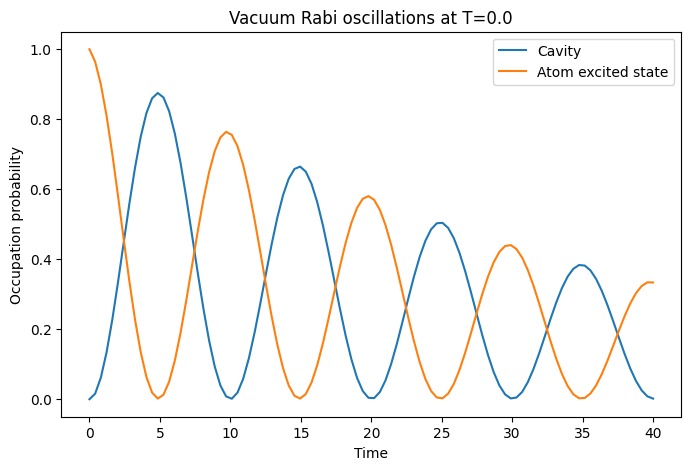

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations at T={}".format(n_th_a))

Set T = 0, discarding photon creation by environment

Text(0.5, 1.0, 'Vacuum Rabi oscillations at T=2.0')

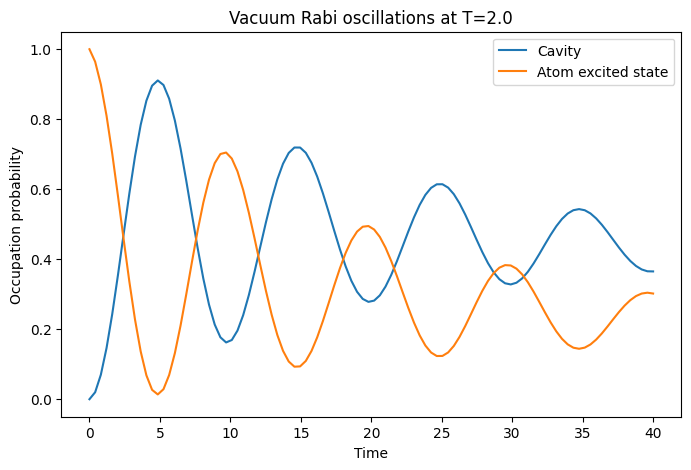

In [19]:
# set temperature
n_th_a = 2.0

# Collapse operators
c_op_list = []

# Photon annihilation
rate = kappa * (1 + n_th_a)
c_op_list.append(np.sqrt(rate) * a)

# Photon creation
rate = kappa * n_th_a
c_op_list.append(np.sqrt(rate) * a.dag())

# Atom annihilation
rate = gamma
c_op_list.append(np.sqrt(rate) * sm)

# evolve system
output_temp = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

# plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output_temp.expect[0], label="Cavity")
ax.plot(tlist, output_temp.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations at T={}".format(n_th_a))


Approximation only works for low temps